## Open the file

In [1]:
# Import the pandas library, which is a powerful tool for data manipulation and analysis.
import pandas as pd

# Specify the file path of the CSV file you want to read.
file = "C:\\Users\\Ramachandraiah\\Downloads\\netflix_titles.csv"
df = pd.read_csv(file)

# Display the first 20 rows of the DataFrame to get an initial look at the data.
df.head(20)

show_id     type                                              title  \
0       s1    Movie                               Dick Johnson Is Dead   
1       s2  TV Show                                      Blood & Water   
2       s3  TV Show                                          Ganglands   
3       s4  TV Show                              Jailbirds New Orleans   
4       s5  TV Show                                       Kota Factory   
5       s6  TV Show                                      Midnight Mass   
6       s7    Movie                   My Little Pony: A New Generation   
7       s8    Movie                                            Sankofa   
8       s9  TV Show                      The Great British Baking Show   
9      s10    Movie                                       The Starling   
10     s11  TV Show                Vendetta: Truth, Lies and The Mafia   
11     s12  TV Show                                   Bangkok Breaking   
12     s13    Movie                                       Je Suis Karl   
13     s14    Movie                   Confessions of an Invisible Girl   
14     s15  TV Show                    Crime Stories: India Detectives   
15     s16  TV Show                                  Dear White People   
16     s17    Movie  Europe's Most Dangerous Man: Otto Skorzeny in ...   
17     s18  TV Show                                    Falsa identidad   
18     s19    Movie                                          Intrusion   
19     s20  TV Show                                             Jaguar   

                                         director  \
0                                 Kirsten Johnson   
1                                             NaN   
2                                 Julien Leclercq   
3                                             NaN   
4                                             NaN   
5                                   Mike Flanagan   
6                   Robert Cullen, José Luis Ucha   
7                                    Haile Gerima   
8                                 Andy Devonshire   
9                                  Theodore Melfi   
10                                            NaN   
11                              Kongkiat Komesiri   
12                            Christian Schwochow   
13                                  Bruno Garotti   
14                                            NaN   
15                                            NaN   
16  Pedro de Echave García, Pablo Azorín Williams   
17                                            NaN   
18                                     Adam Salky   
19                                            NaN   

                                                 cast  \
0                                                 NaN   
1   Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   
2   Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...   
3                                                 NaN   
4   Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...   
5   Kate Siegel, Zach Gilford, Hamish Linklater, H...   
6   Vanessa Hudgens, Kimiko Glenn, James Marsden, ...   
7   Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
8   Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...   
9   Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   
10                                                NaN   
11  Sukollawat Kanarot, Sushar Manaying, Pavarit M...   
12  Luna Wedler, Jannis Niewöhner, Milan Peschel, ...   
13  Klara Castanho, Lucca Picon, Júlia Gomes, Marc...   
14                                                NaN   
15  Logan Browning, Brandon P. Bell, DeRon Horton,...   
16                                                NaN   
17  Luis Ernesto Franco, Camila Sodi, Sergio Goyri...   
18  Freida Pinto, Logan Marshall-Green, Robert Joh...   
19  Blanca Suárez, Iván Marcos, Óscar Casas, Adriá...   

                                              country          date_added  \
0                                       United States  Sept

## Look at a couple of texts

In [2]:
# Retrieve and print the first 400 characters of the text in row 2666.
print(repr(df.iloc[2666]["description"][0:400]))
print(repr(df.iloc[4726]["description"][0:400])) 

'Kenya Barris and his family navigate relationships, race and culture while grappling with their newfound success in this comedy series.'
'City girl Veera is kidnapped on the eve of her wedding, but as her captors take her through the countryside, Veera finds herself feeling emancipated.'


In [3]:
# Replace missing values with an empty string
df["description"] = df["description"].fillna("")
import re
df["paragraphs"] = df["description"].map(lambda text: re.split('\.\s*\n', text))
df["number_of_paragraphs"] = df["paragraphs"].map(len)

In [4]:
!pip install spacy

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords
# Convert stop words set to a list
stopwords_list = list(stopwords)
# Initialize TfidfVectorizer with the list of stop words
tfidf_text_vectorizer = TfidfVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)

# Fit and transform the text data
tfidf_text_vectors = tfidf_text_vectorizer.fit_transform(df['description'])
tfidf_text_vectors.shape

C:\Users\himav\.anaconda\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(8807, 4652)

## Make a data frame of sentences

In [14]:
# flatten the paragraphs keeping the case_outcome
paragraph_df = pd.DataFrame([
    { "description": paragraph, "release_year": case_outcome}
    for paragraphs, case_outcome in zip(df["paragraphs"], df["release_year"])
    for paragraph in paragraphs if paragraph])
paragraph_df.head(10)  

description  release_year
0  As her father nears the end of his life, filmm...          2020
1  After crossing paths at a party, a Cape Town t...          2021
2  To protect his family from a powerful drug lor...          2021
3  Feuds, flirtations and toilet talk go down amo...          2021
4  In a city of coaching centers known to train I...          2021
5  The arrival of a charismatic young priest brin...          2021
6  Equestria's divided. But a bright-eyed hero be...          2021
7  On a photo shoot in Ghana, an American model s...          1993
8  A talented batch of amateur bakers face off in...          2021
9  A woman adjusting to life after a loss contend...          2021

## Get the TFIDF of the sentences DF

In [15]:
# Use 'english' instead of the set of stop words
tfidf_para_vectorizer = TfidfVectorizer(stop_words='english',
    min_df=5, max_df=0.7)
tfidf_para_vectors = tfidf_para_vectorizer.fit_transform(paragraph_df["description"])

# Print the shape of the resulting TF-IDF matrix.
tfidf_para_vectors.shape

(8807, 4653)

## Non-negative Matrix Factorization (NMF)

In [16]:
# Import NMF (Non-Negative Matrix Factorization) from scikit-learn for matrix factorization.
from sklearn.decomposition import NMF

In [17]:
# Initialize NMF model with 10 components and a random state for reproducibility.
nmf_text_model = NMF(n_components=10, random_state=42)
W_text_matrix = nmf_text_model.fit_transform(tfidf_text_vectors)

# Extract the components (topic-term matrix) learned by the NMF model.
H_text_matrix = nmf_text_model.components_

C:\Users\himav\.anaconda\Lib\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


## Getting our 10 topics

In [18]:
# Display the top words for each topic in a given NMF model.
def display_topics(model, features, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1] # invert sort order
        print("\nTopic %02d" % topic)
    for i in range(0, no_top_words):
        print(" %s (%2.2f)" % (features[largest[i]], abs(words[largest[i]]*100.0/total)))

# Call the function outside its definition with the appropriate arguments
display_topics(nmf_text_model, tfidf_text_vectorizer.get_feature_names())

In [19]:
def display_topics(model, features, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1] # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print(" %s (%2.2f)" % (features[largest[i]], abs(words[largest[i]]*100.0/total)))

# Example usage:
#display_topics(nmf_text_model, tfidf_text_vectorizer.get_feature_names())
display_topics(nmf_text_model,tfidf_text_vectorizer.get_feature_names_out())


Topic 00
 father (1.10)
 find (0.94)
 son (0.73)
 death (0.71)
 daughter (0.70)

Topic 01
 young (5.83)
 man (4.33)
 woman (4.08)
 love (0.93)
 falls (0.92)

Topic 02
 documentary (3.14)
 series (2.91)
 follows (1.25)
 lives (1.07)
 story (0.97)

Topic 03
 life (6.20)
 love (2.99)
 school (2.53)
 high (2.38)
 student (0.84)

Topic 04
 new (9.71)
 york (2.61)
 city (2.03)
 finds (1.05)
 home (1.04)

Topic 05
 family (9.34)
 home (1.36)
 returns (0.78)
 wealthy (0.61)
 years (0.54)

Topic 06
 friends (6.54)
 best (2.42)
 fun (0.82)
 friend (0.78)
 adventures (0.75)

Topic 07
 old (7.85)
 year (6.80)
 girl (0.84)
 11 (0.77)
 10 (0.75)

Topic 08
 stand (3.48)
 special (3.46)
 comedy (2.42)
 comedian (2.05)
 takes (1.65)

Topic 09
 world (7.02)
 war (2.00)
 ii (1.34)
 save (0.71)
 way (0.53)


In [20]:
# Initialize NMF model with 10 components and a random state for reproducibility.
nmf_para_model = NMF(n_components=10, random_state=42)
W_para_matrix = nmf_para_model.fit_transform(tfidf_para_vectors)
H_para_matrix = nmf_para_model.components_
display_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names_out())


Topic 00
 world (2.53)
 documentary (1.88)
 series (1.64)
 war (0.86)
 follows (0.70)

Topic 01
 young (3.64)
 man (2.88)
 woman (2.56)
 father (0.99)
 mother (0.64)

Topic 02
 school (6.15)
 high (5.26)
 student (1.55)
 students (1.23)
 teen (1.18)

Topic 03
 life (9.73)
 death (0.73)
 career (0.66)
 real (0.63)
 changing (0.43)

Topic 04
 new (8.45)
 york (2.28)
 city (1.85)
 finds (1.07)
 home (0.94)

Topic 05
 family (7.08)
 home (1.24)
 father (1.02)
 years (0.82)
 returns (0.78)

Topic 06
 love (7.41)
 falls (1.88)
 true (1.06)
 romance (0.97)
 fall (0.95)

Topic 07
 old (6.99)
 year (6.02)
 girl (0.74)
 home (0.72)
 boy (0.71)

Topic 08
 special (3.35)
 stand (3.33)
 comedy (2.36)
 comedian (1.95)
 takes (1.64)

Topic 09
 friends (5.48)
 best (1.96)
 help (1.14)
 save (0.83)
 fun (0.73)


In [21]:
# Compute the sum of each column (topic) in the document-topic matrix (W_matrix)
W_text_matrix.sum(axis=0)/W_text_matrix.sum()*100.0

array([ 9.73419107, 14.02262082, 12.81891617, 12.71138519, 10.29384396,
        8.86367433,  9.63900499,  6.48844285,  7.08908499,  8.33883564])

In [22]:
# Compute the sum of each column (topic) in the document-topic matrix (W_para_matrix)
W_para_matrix.sum(axis=0)/W_para_matrix.sum()*100.0

array([ 8.1905117 , 16.97630329,  9.15864984, 10.27297434, 10.41421766,
       10.34298172,  8.8286931 ,  7.33193737,  8.46000311, 10.02372787])

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
count_para_vectorizer = CountVectorizer(stop_words='english', min_df=5,
max_df=0.7)
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["description"])
count_para_vectors.shape



(8807, 4653)

In [25]:
# Define and fit the LDA model
from sklearn.decomposition import LatentDirichletAllocation
lda_para_model = LatentDirichletAllocation(n_components = 10,
random_state=42)
W_lda_para_matrix = lda_para_model.fit_transform(count_para_vectors)
H_lda_para_matrix = lda_para_model.components_

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
count_para_vectorizer = CountVectorizer(stop_words='english',
min_df=5, max_df=0.7)

# Fit and transform the text data
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["description"])
count_para_vectors.shape

(8807, 4653)

In [27]:
from sklearn.decomposition import LatentDirichletAllocation

## Define and fit the LDA model

In [28]:
lda_para_model = LatentDirichletAllocation(n_components = 10,
random_state=42)
W_lda_para_matrix = lda_para_model.fit_transform(count_para_vectors)
H_lda_para_matrix = lda_para_model.components_

## Start by cutting the paragraphs into words:

In [29]:
def display_topics(model, feature_names, no_top_words=5):
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic %d:" % (topic_idx + 1))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Get feature names from the vocabulary generated by CountVectorizer
feature_names = count_para_vectorizer.get_feature_names_out()

# Display topics using the vocabulary generated by CountVectorizer
display_topics(lda_para_model, feature_names)


Topic 1:
life war world footage star

Topic 2:
love life woman new town

Topic 3:
life young man crime woman

Topic 4:
young love girl family school

Topic 5:
new true young woman old

Topic 6:
world war save new story

Topic 7:
family woman stand love comedian

Topic 8:
new team agent prison soccer

Topic 9:
life new school comedy series

Topic 10:
friends world series save christmas


In [30]:
# Compute the sum of each column (topic) in the document-topic matrix (W_lda_para_matrix)
W_lda_para_matrix.sum(axis=0)/W_lda_para_matrix.sum()*100.0

array([ 8.56647968, 10.22943206, 10.67621518, 10.91799048,  8.38279998,
       10.19758223, 10.72724233,  9.62964104, 10.05437237, 10.61824465])

## Draw wordclouds for the 10 topics

In [31]:
# Import necessary libraries
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.display import display, HTML

# Set the height of the output scroll area for better visualization
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

# Generate and display word clouds for each topic in a given topic model.
def wordcloud_topics(model, features, no_top_words=40):
    for topic, words in enumerate(model.components_):
        size = {}
        largest = words.argsort()[::-1] # invert sort order
        for i in range(0, no_top_words):
            size[features[largest[i]]] = abs(words[largest[i]])
        wc = WordCloud(background_color="white", max_words=100, width=960, height=540)
        wc.generate_from_frequencies(size)
        plt.figure(figsize=(12,12))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        # if you don't want to save the topic model, comment the next line
        plt.savefig(f'topic{topic}.png')

## The NMF wordclouds:

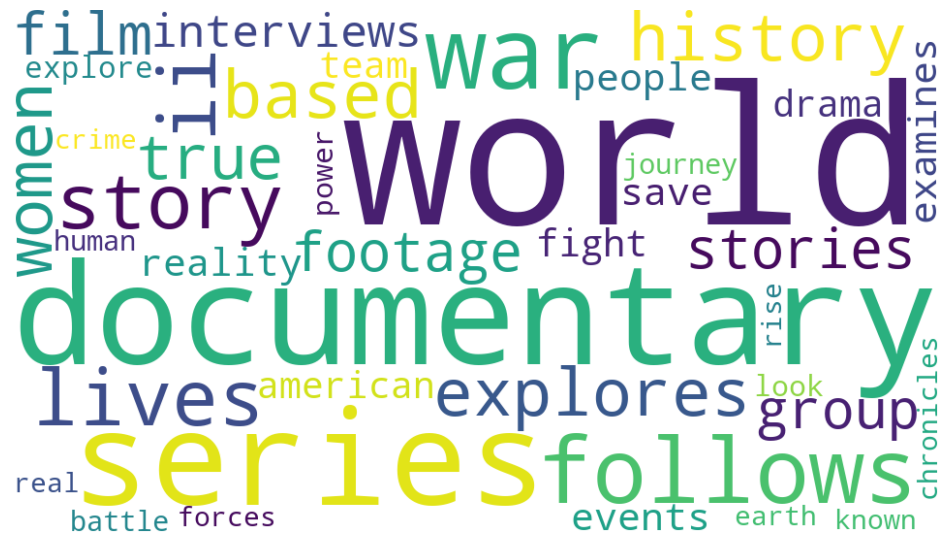

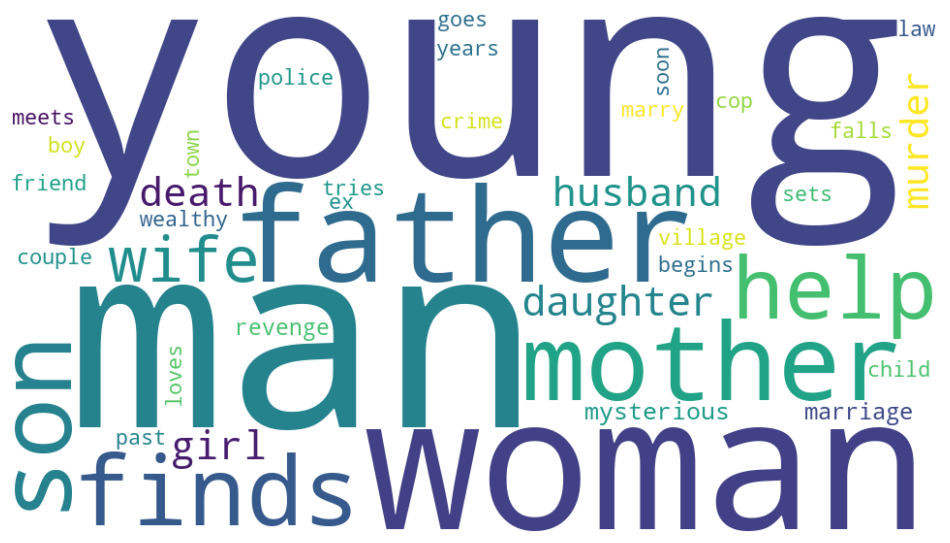

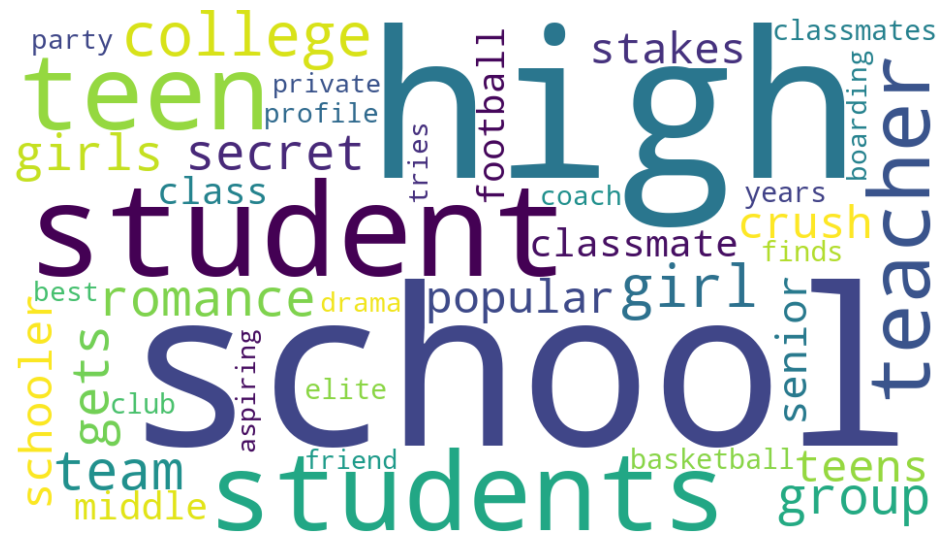

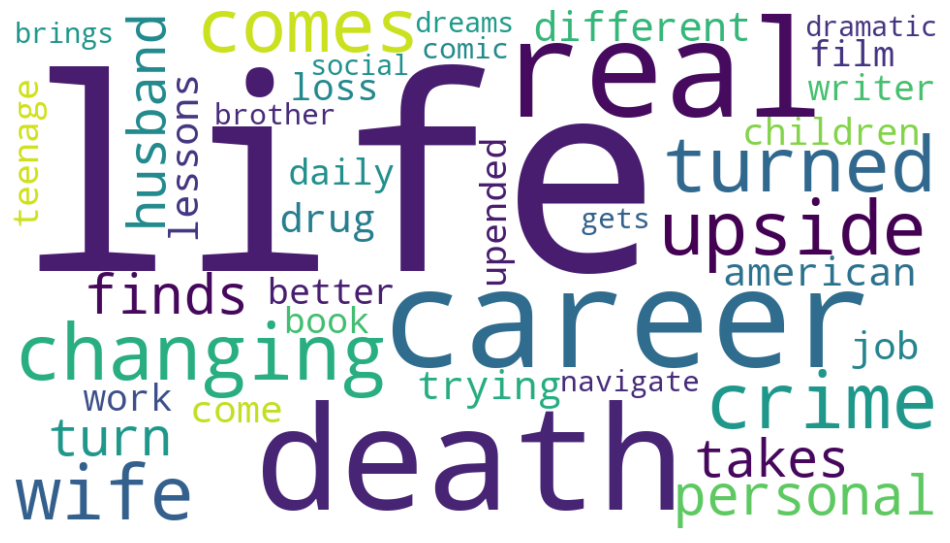

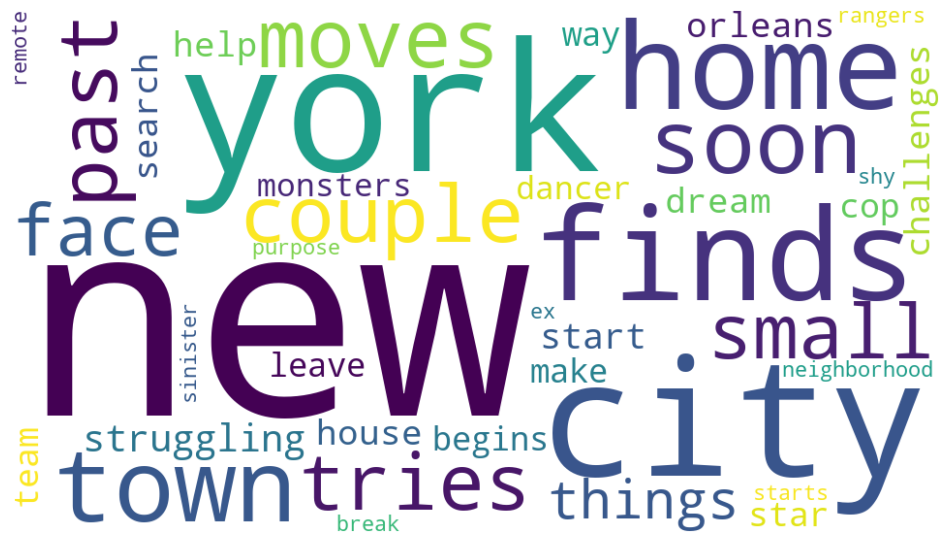

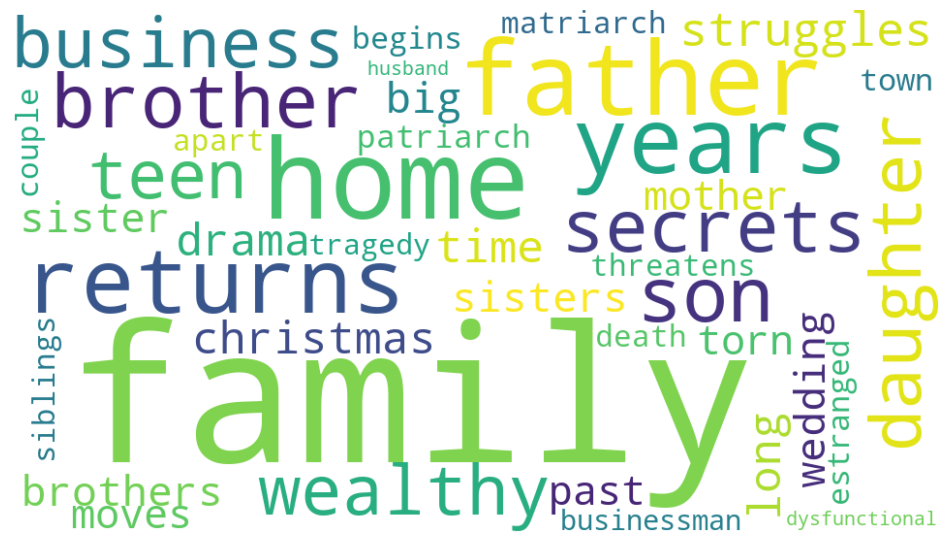

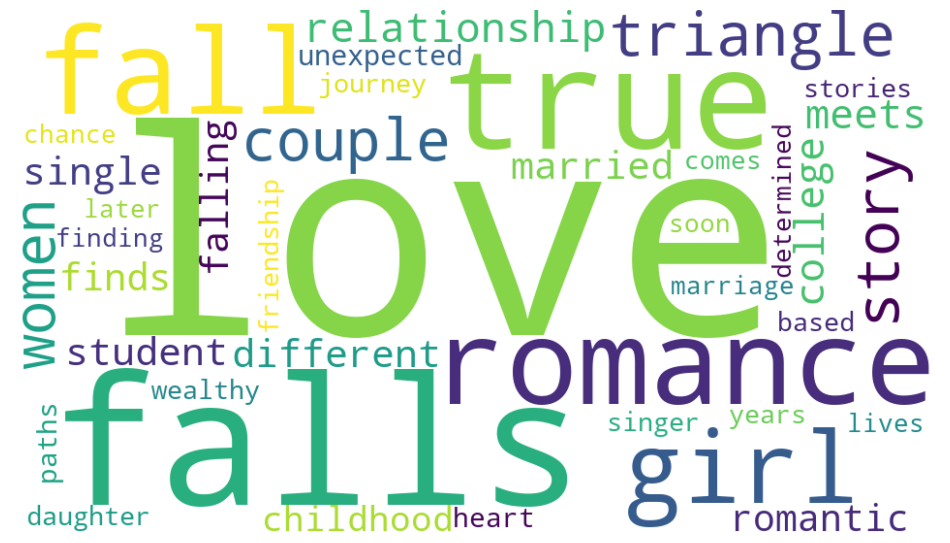

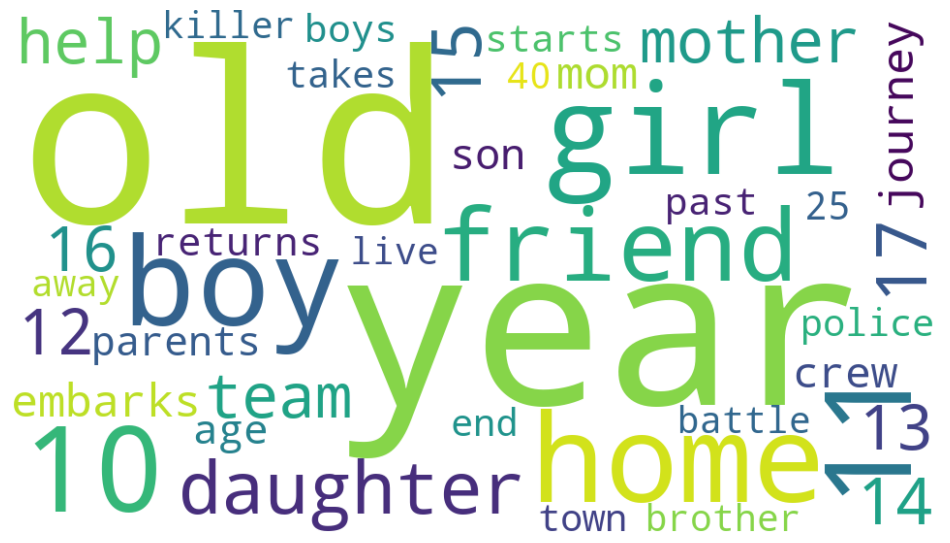

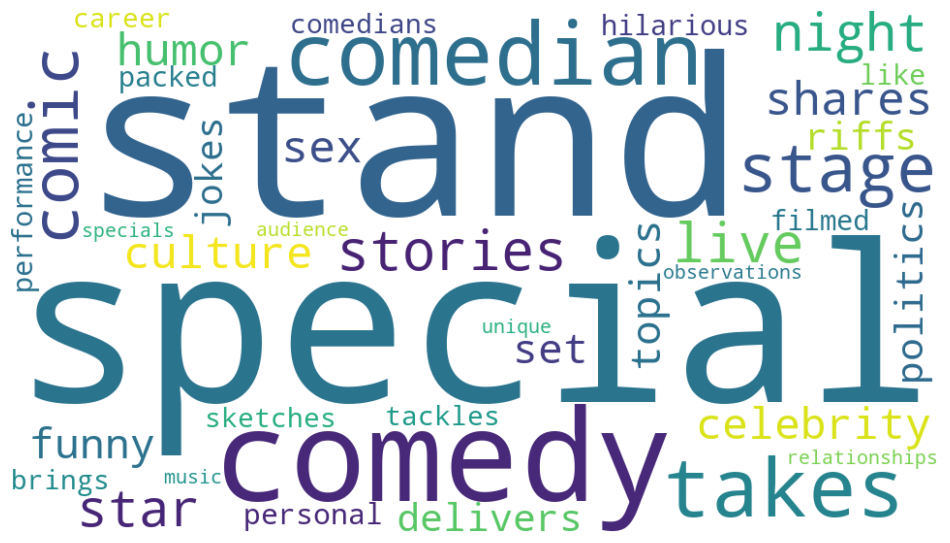

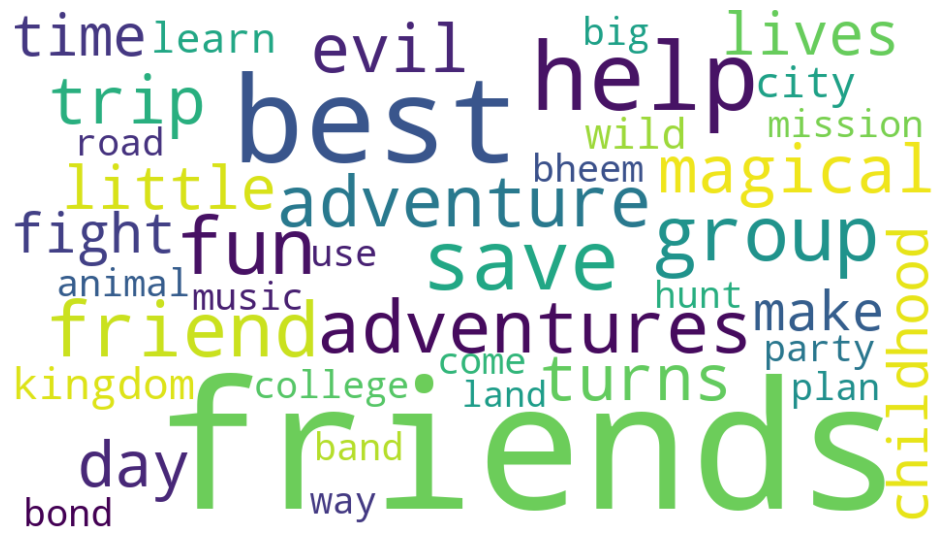

In [32]:
# Generate and display word clouds for each topic in the given topic model
wordcloud_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names_out())

## The LDA wordclouds

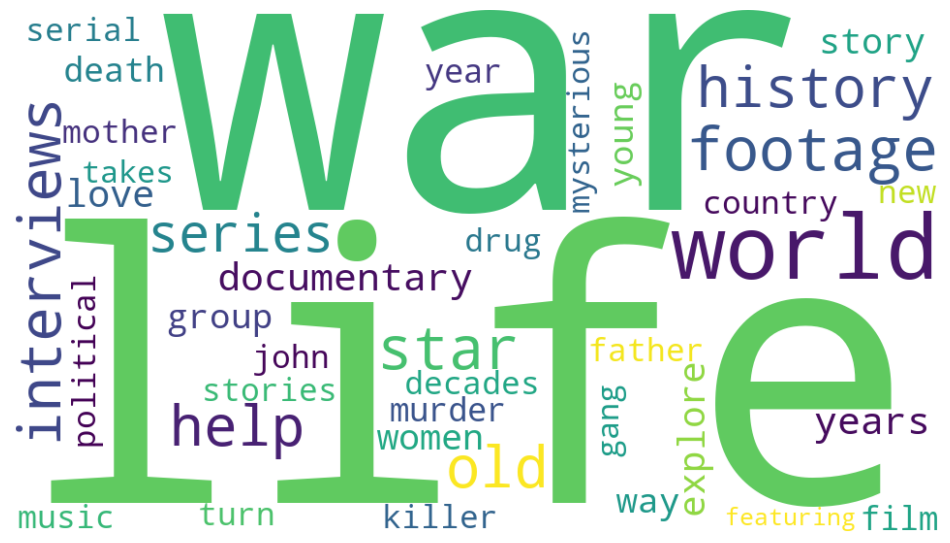

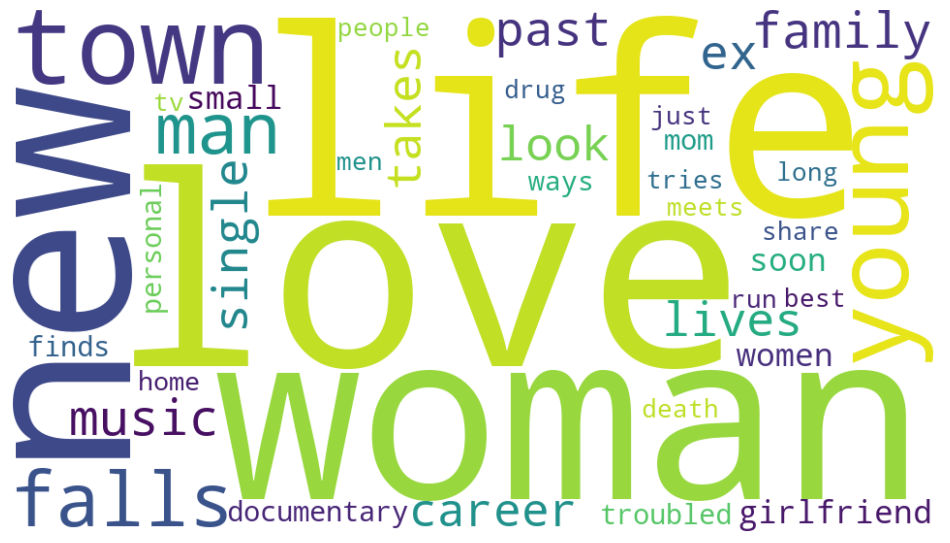

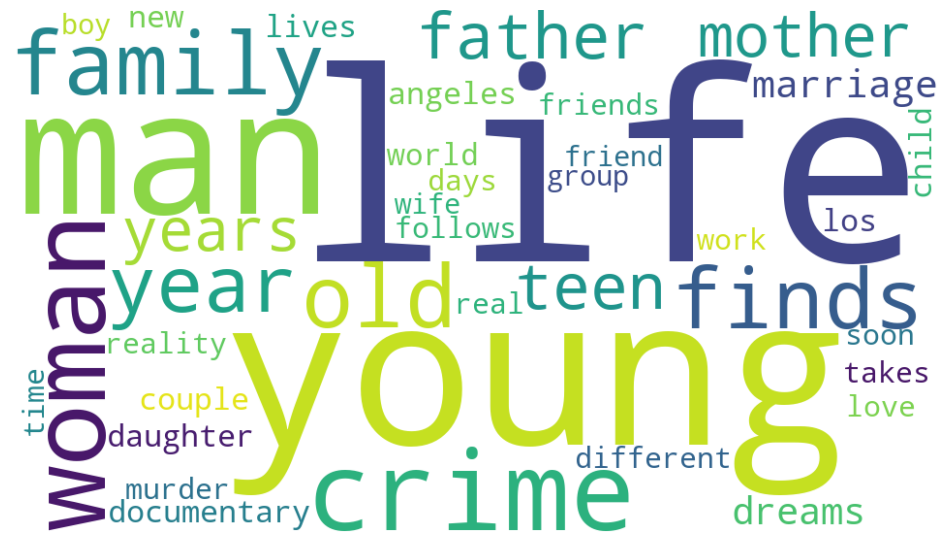

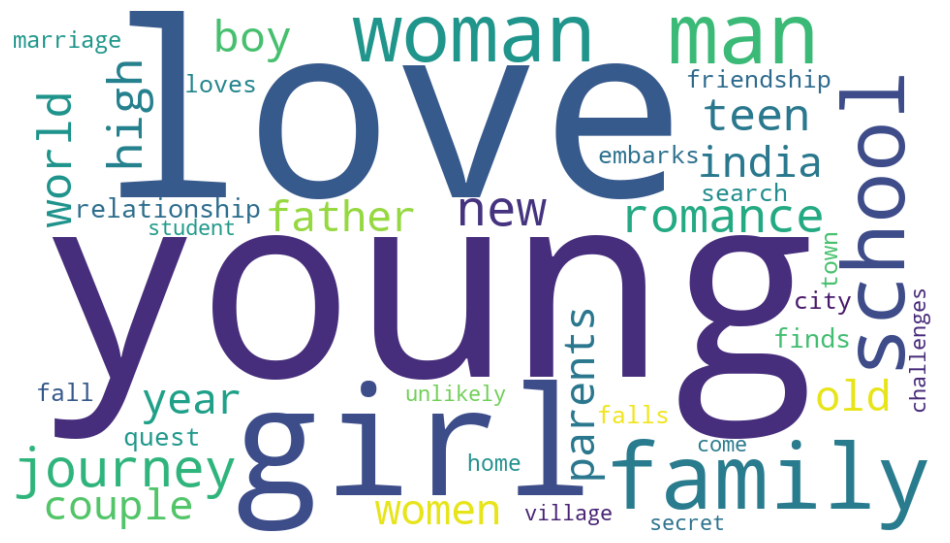

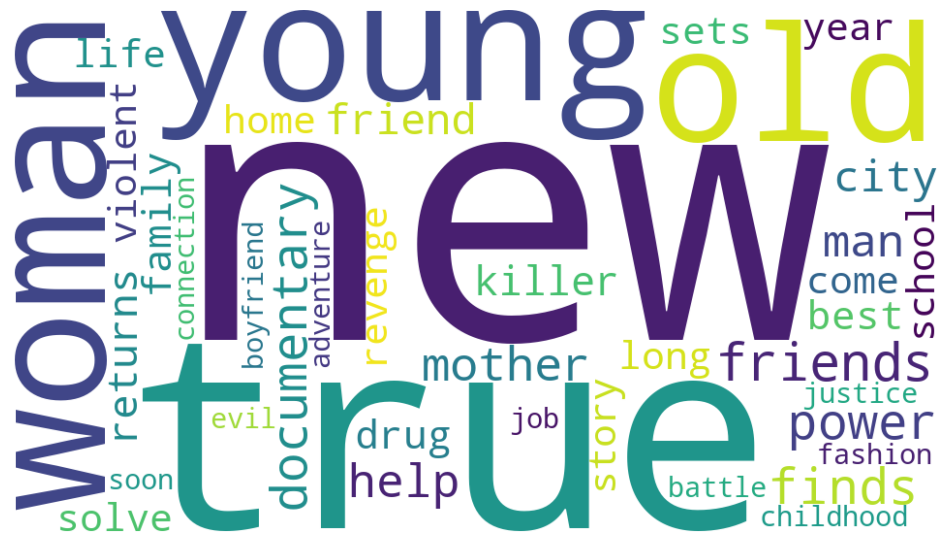

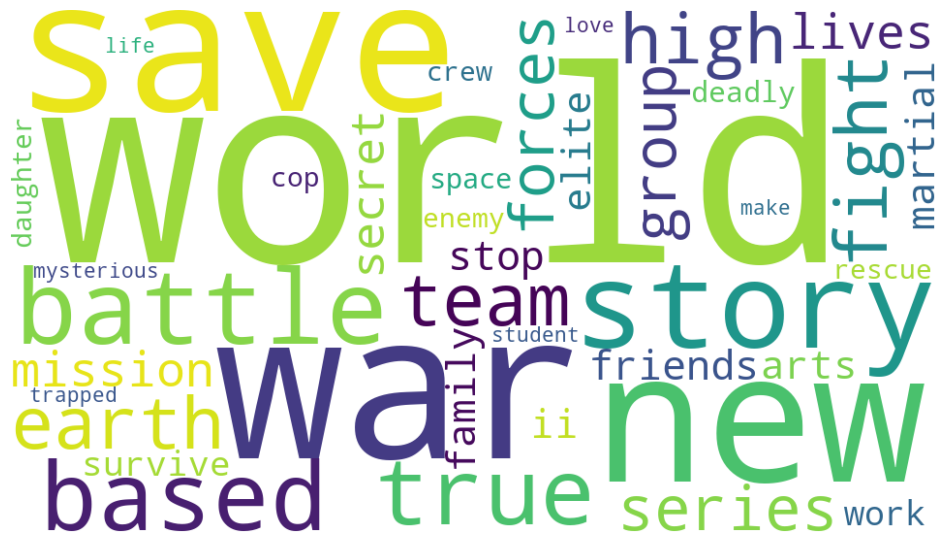

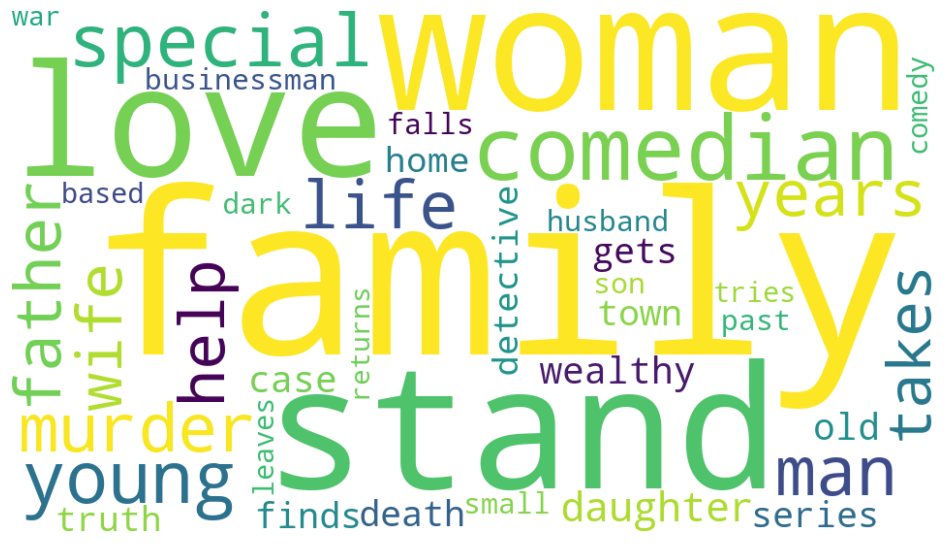

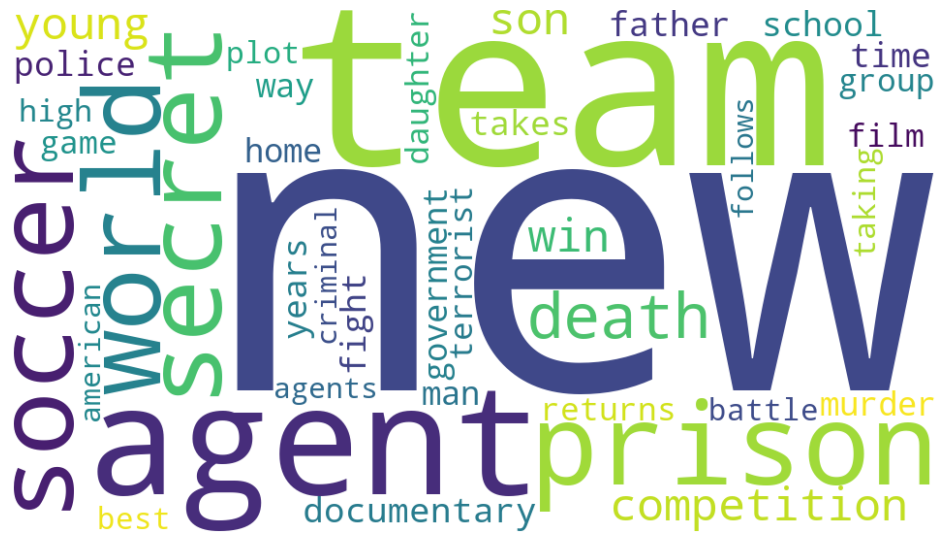

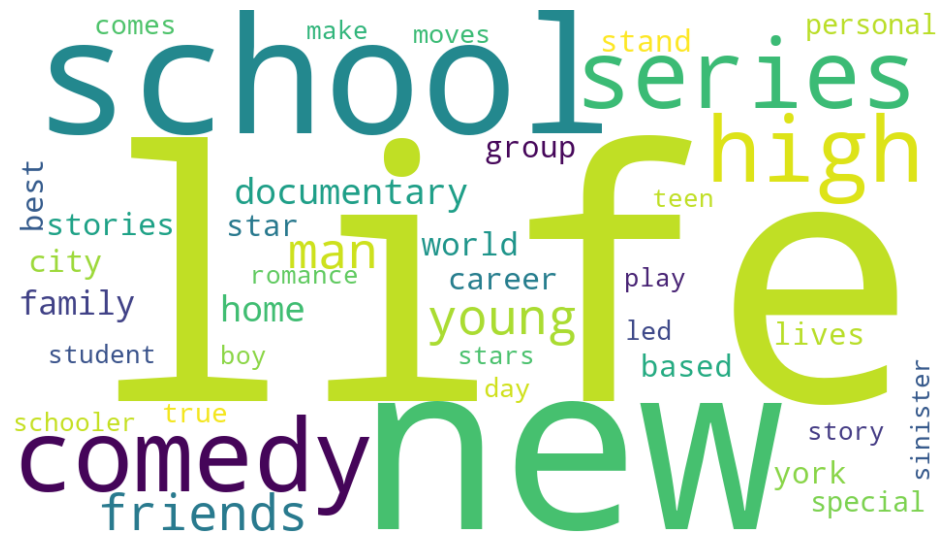

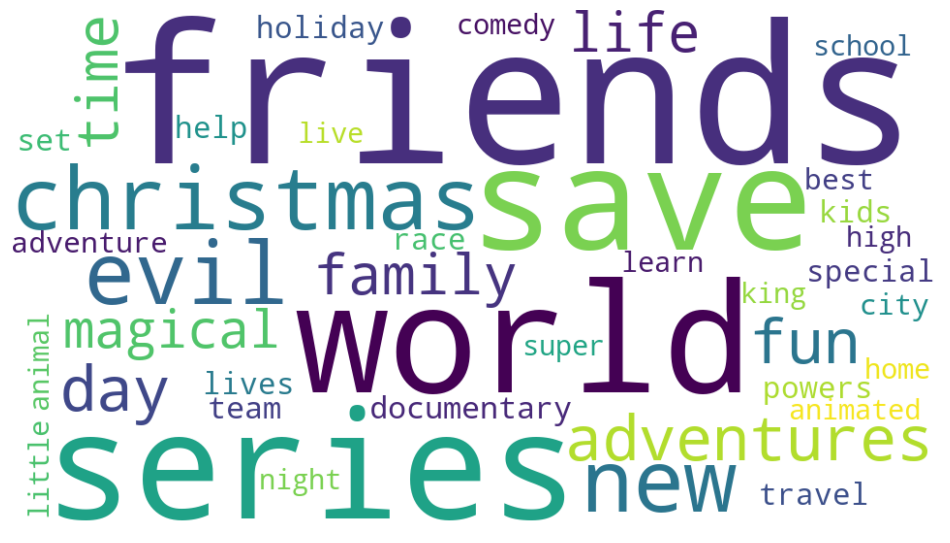

In [33]:
# Generate and display word clouds for each topic in the given topic model
wordcloud_topics(lda_para_model, count_para_vectorizer.get_feature_names_out())

In [34]:
# Initialize an empty list to store the names of the topics
topic_names = []

# Get the list of feature names (vocabulary) from the TF-IDF vectorizer
voc = tfidf_para_vectorizer.get_feature_names_out()

# Iterate over each topic in the NMF model components
for topic in nmf_para_model.components_:
    important = topic.argsort()
    top_word = voc[important[-1]] + " " + voc[important[-2]]
    
    # Append the topic name to the list of topic names
    topic_names.append("Topic " + top_word)

## Separate data by year

In [36]:
# Import necessary libraries
from tqdm.auto import tqdm
import numpy as np

# Initialize an empty list to store the year-wise topic distribution data
year_data = []

# Get the unique years from the paragraph DataFrame
unique_years = np.unique(paragraph_df["year"])

# Iterate over unique years, tracking progress with tqdm
for year in tqdm(unique_years):
    year_indices = np.array(paragraph_df["year"] == year)
    if np.any(year_indices):  # Check if there are samples available for the current year
        W_year = nmf_para_model.transform(tfidf_para_vectors[year_indices])
        year_data.append([year] + list(W_year.sum(axis=0) / W_year.sum() * 100.0))

  0%|          | 0/8775 [00:00<?, ?it/s]

## Draw time chart

<Axes: xlabel='price'>

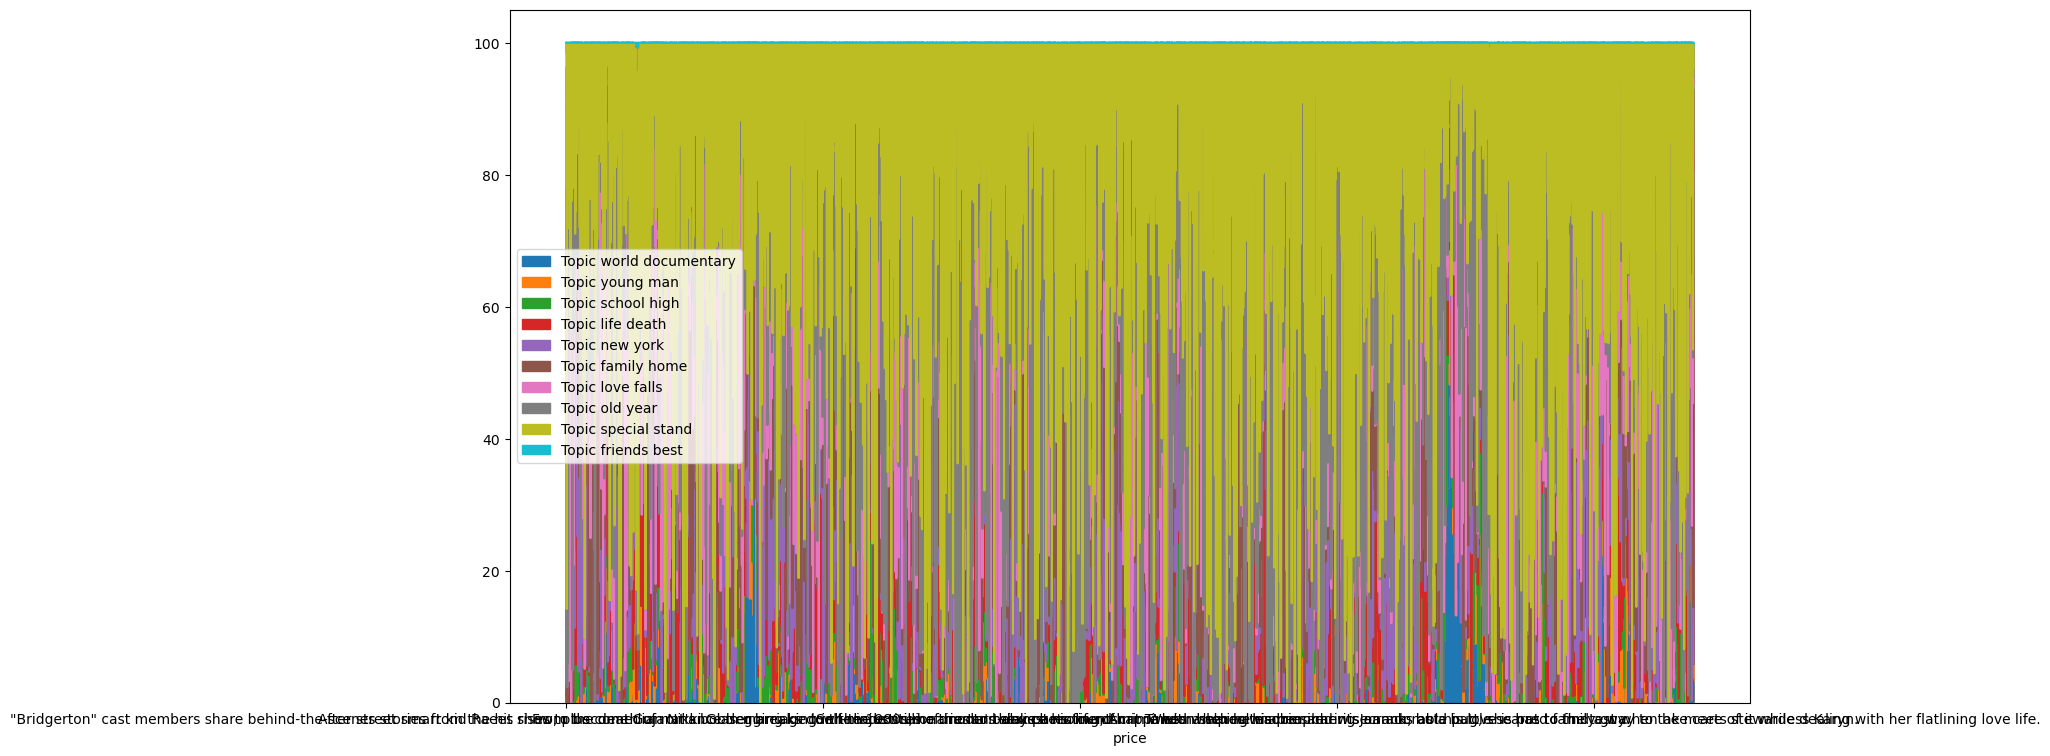

In [37]:
# Import necessary library
import matplotlib.pyplot as plt

# Create a DataFrame from the year-wise topic distribution data
df_year = pd.DataFrame(year_data, columns=["price"] +
topic_names).set_index("price")

# Plot the data as an area plot
df_year.plot.area(figsize=(16,9))